In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### Process Model

\begin{equation}
    x(t)  =  \alpha x(t-1) (1- x(t-1))  + \delta_t, \quad \delta_t  \sim  N(0,q^2)
\end{equation}

In [2]:
def process(alpha,x0,a,T,q):
    t = np.arange(a,T+1,1)
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(1,len(t)):
        x[i] = alpha*x[i-1] *(1-x[i-1]) + np.random.normal(0,q)
    return x,t
a = 0
T = 30
x0 = np.random.normal(0.1,0.01)
q = 0.001
r = 0.005
alpha = 0.9
x,t = process(alpha,x0,a,T,q)

<IPython.core.display.Javascript object>


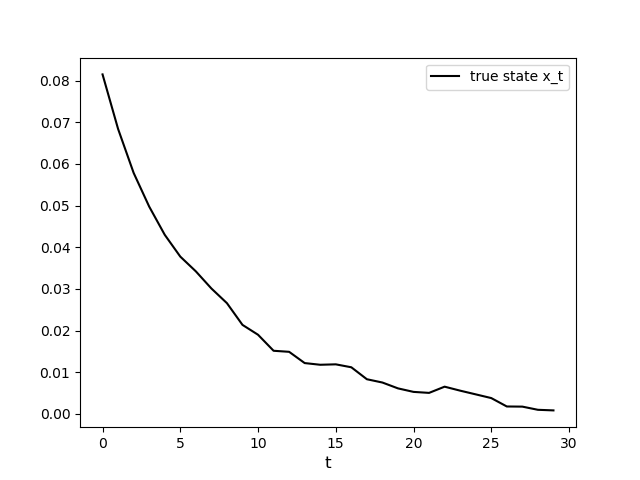

In [3]:
figure(1)
clf()
state,=plt.plot(x[1:],'k',markersize=4)
plt.legend([state], ['true state x_t'])
xlabel('t', fontsize=12)
show()

### Data Model

\begin{equation}
    y(t)  =  x(t) + \epsilon_t, \quad \epsilon_t  \sim  N(0,r^2)
\end{equation}

In [4]:
def data(x,r):
    y = x[1:] + np.random.normal(0,r,len(x)-1)
    return y

<IPython.core.display.Javascript object>


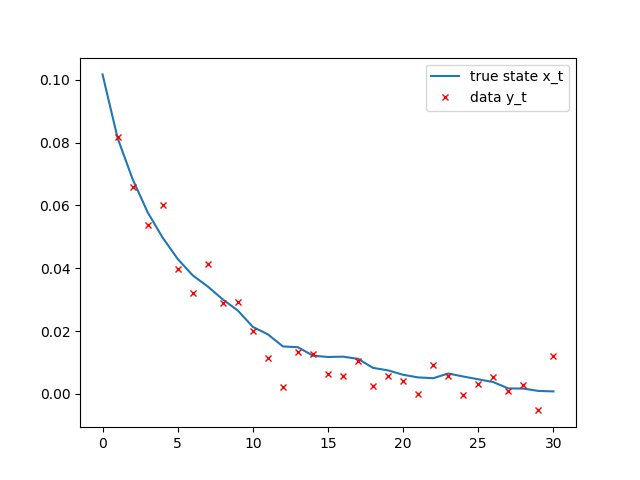

In [5]:
y = data(x,r)
figure(2)
state,=plt.plot(x,markersize=4)
data,=plt.plot(t[1:],y,'rx',markersize=4)
plt.legend([state,data], ['true state x_t','data y_t'])
show()

\begin{equation}
     M_t^\prime  =  \alpha  - 2 \alpha x
\end{equation}

### Kalman Filter Algorithm

\begin{align*}
    \mathcal{M}_t &=  \alpha x ( 1 -  x) \quad \text{ the jacobian of the non-linear process}\\
    M_t  &=  \alpha ( 1 - 2x)
\end{align*}

In [6]:
# Derivative of the non-linear function M_t
def M_t(alpha,x):
    return alpha*(1 -  2*x)

#The non-linear function h_t

def m_t(alpha,x):
    return alpha * x*(1 - x)

# Derivative of the non-linear function H_t
def H_t():
    return 1

#The non-linear function h_t
def h_t(x):
    return x

In [7]:
def kalman(alpha,q,r,y,T,mu,sig,m_t,M_t,H_t):
    gain = np.zeros(T)
    mu_new = np.zeros(T)
    forcast=np.zeros(T)
    forcast_u=np.zeros(T)
    sig_new = np.zeros(T)
    mu_old =  m_t(alpha,mu)
    sig_old =  q  + M_t(alpha, mu) * sig *  M_t(alpha, mu)
    for i in range(0,T):
        forcast[i]=mu_old
        forcast_u[i]=sig_old
        gain[i] = sig_old * H_t() * (H_t() * sig_old * H_t() + r)**(-1) # gain matrix K_t
        mu_new[i] = mu_old + gain[i] * (y[i] - h_t(mu_old)) #returns the new mu value
        sig_new[i] = (1-gain[i] * H_t()) * sig_old #returns new sigma (variance)
        mu_old = m_t(alpha, mu_new[i])
        sig_old = q +   M_t(alpha, mu_new[i]) * sig_new[i] *  M_t(alpha, mu_new[i])
    return mu_new,sig_new,gain,forcast, forcast_u

In [8]:
mu =  0.1
sig  =  0.01
mu_new, sig_new, gain,forcast, forcast_u = kalman(alpha,q**2,r**2,y,T,mu,sig,m_t,M_t,H_t)

<IPython.core.display.Javascript object>


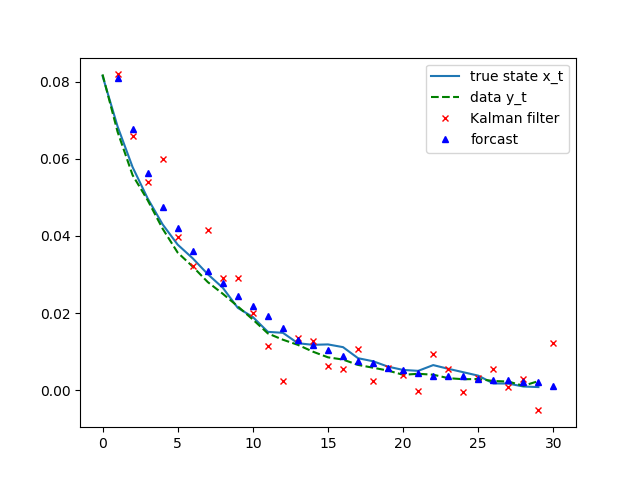

In [11]:
figure(3)
plt.plot(x[1:],markersize=4)
plt.plot(mu_new,'--g',markersize=4)
plt.plot(t[1:],y,'rx',markersize=4)
plt.plot(t[1:],forcast,'b^',markersize=4)
plt.legend(['true state x_t','data y_t','Kalman filter','forcast'])
plt.show()

<IPython.core.display.Javascript object>


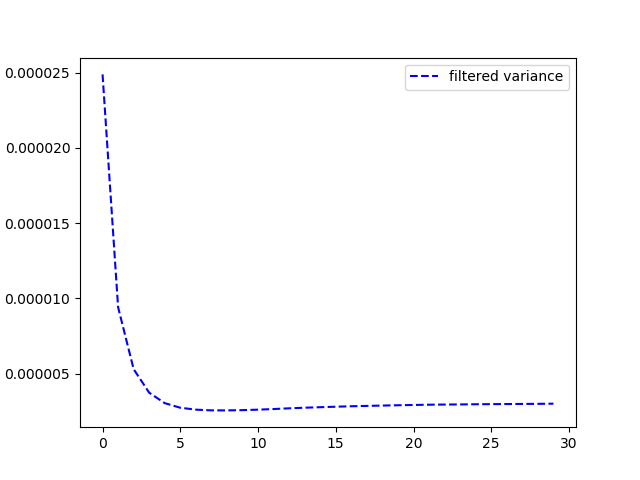

In [10]:
figure(4)
fvar,=plt.plot(sig_new,'--b',markersize=4)
plt.legend([fvar], ['filtered variance'])
show()